**1. Importing the dependencies**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

**2. Data Loading and Understanding**

In [78]:
# load telecom csv data to a pandas dataframe
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [79]:
# Shape of dataset
shape = df.shape
print(shape)

(7043, 21)


In [80]:
# desplaying overview of dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
# Set dsplay max_columns option for showing all column
pd.set_option('display.max_columns', None)

In [82]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [83]:
# Information abour dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
# dropping customerID column as this is not required for modelling
df.drop("customerID", axis =1, inplace=True)

In [85]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [86]:
# Showing all columns
column = df.columns
print(column)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [87]:
print(df["gender"].unique())

['Female' 'Male']


In [88]:
print(df["SeniorCitizen"].unique())

[0 1]


In [89]:
# printing the unique value in all column except tenure, MonthlyCharges, TotalCharges
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, ":", df[col].unique())
    print("-"*50)


gender : ['Female' 'Male']
--------------------------------------------------
SeniorCitizen : [0 1]
--------------------------------------------------
Partner : ['Yes' 'No']
--------------------------------------------------
Dependents : ['No' 'Yes']
--------------------------------------------------
PhoneService : ['No' 'Yes']
--------------------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup : ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection : ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport : ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV : [

In [90]:
# Checking null value
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [91]:
# Cheking Duplicates value
duplicate_value = print(df.duplicated().sum())
duplicate_value

22


In [92]:
# Drop duplicated value
df.drop_duplicates(inplace= True)

In [93]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [94]:
len(df[df['TotalCharges']== " "])

11

In [95]:
# replace the blank space with 0.0 then apply astype to convert total charges object to float type
df['TotalCharges'] = df["TotalCharges"].replace({" ":"0.0"})

In [96]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [98]:
# Checking the class distribution of target column
df.Churn.value_counts()

,count
Churn,
No,5164
Yes,1857


**Insights:**
1. Customer ID removed as it is not required for modelling
2. No mmissing values in the dataset
3. 22 Duplicates value found in Datasets and were droped
4. Missing values in the TotalCharges column were replaced with 0
5. Class imbalance identified in the target

**3. Exploratory Data Analysis (EDA)**

In [99]:
df.shape

(7021, 20)

In [100]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [101]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [102]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2286.765026
std,0.368947,24.534965,30.069001,2266.855057
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.750000,403.350000
50%,0.000000,29.000000,70.400000,1400.550000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


**Data aggregation using SQLite3**

In [103]:
# Create a connection to the SQLite database
conn = sqlite3.connect('telecom_data.db')

# Write the DataFrame to a SQLite table
df.to_sql('telecom_customers', conn, if_exists='replace', index=False)


# 1. Average monthly charges by churn status
query1 = """
SELECT Churn, AVG(MonthlyCharges) AS AverageMonthlyCharges
FROM telecom_customers
GROUP BY Churn;
"""

# 2. Count of customers by InternetService and Contract
query2 = """
SELECT InternetService, Contract, COUNT(*) AS CustomerCount
FROM telecom_customers
GROUP BY InternetService, Contract;
"""

# 3. TotalCharges by Payment Method
query3 = """
SELECT PaymentMethod, SUM(TotalCharges) AS TotalChargesSum
FROM telecom_customers
GROUP BY PaymentMethod;
"""

# 4. Average Tenure for Senior citizens v/s Non-senior citizens
query4 = """
SELECT SeniorCitizen, AVG(tenure) AS AverageTenure
FROM telecom_customers
GROUP BY SeniorCitizen;
"""

# 5. Number of Customers by Gender and Churn
query5 = """
  SELECT gender, Churn, COUNT(*) AS CustomerCount
  FROM telecom_customers
  GROUP BY gender, Churn;
"""


# Execute the queries and print the results
queries = [query1, query2, query3, query4, query5]
for query in queries:
  print("-" * 80)
  print(f"Query: \n{query}")
  result = pd.read_sql_query(query, conn)
  print(result)


# Close the connection
conn.close()


--------------------------------------------------------------------------------
Query: 

SELECT Churn, AVG(MonthlyCharges) AS AverageMonthlyCharges
FROM telecom_customers
GROUP BY Churn;

  Churn  AverageMonthlyCharges
0    No              61.344878
1   Yes              74.604308
--------------------------------------------------------------------------------
Query: 

SELECT InternetService, Contract, COUNT(*) AS CustomerCount
FROM telecom_customers
GROUP BY InternetService, Contract;

  InternetService        Contract  CustomerCount
0             DSL  Month-to-month           1221
1             DSL        One year            570
2             DSL        Two year            628
3     Fiber optic  Month-to-month           2122
4     Fiber optic        One year            539
5     Fiber optic        Two year            429
6              No  Month-to-month            510
7              No        One year            364
8              No        Two year            638
------------------

**Numerical Features - Analysis**

Understand the distribution of the numerical features

In [104]:
def plot_histogram(df, column_name):
  plt.figure(figsize=(6,4))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Histogram of {column_name}")
  plt.xlabel(column_name)
  plt.ylabel("Frequency")

  # Calculate the mean and median values for columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color = "red", linestyle = "--", label ="Mean")
  plt.axvline(col_median, color = "green", linestyle ="-", label ="Median")

  plt.legend()
  plt.show()

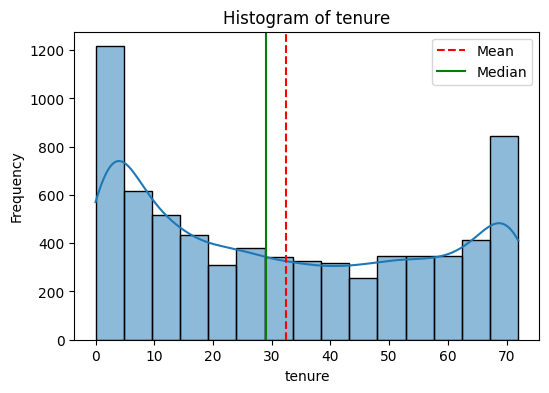

In [105]:
plot_histogram(df, "tenure")

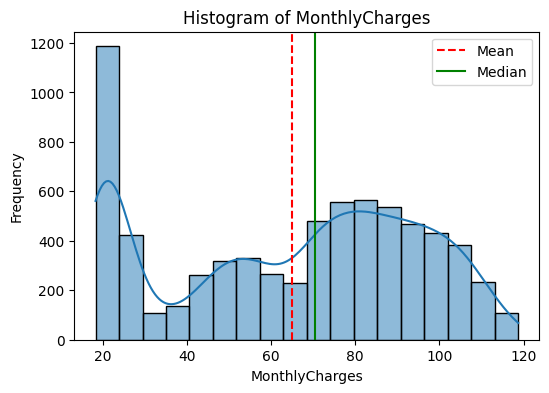

In [106]:
plot_histogram(df, "MonthlyCharges")

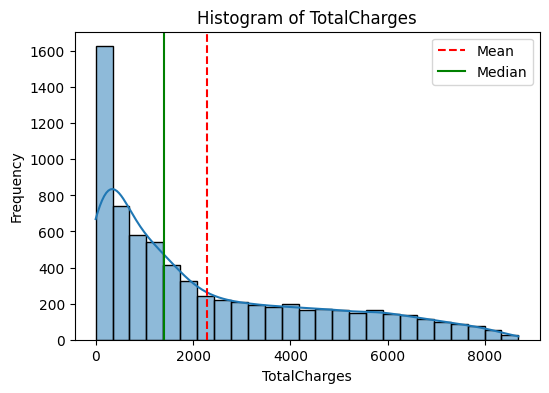

In [107]:
plot_histogram(df, "TotalCharges")

**Box plot for numerical features**

In [108]:
def plot_boxplot(df, column_name):
  plt.figure(figsize=(6,4))
  sns.boxplot(x = df[column_name])
  plt.title(f"Boxplot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

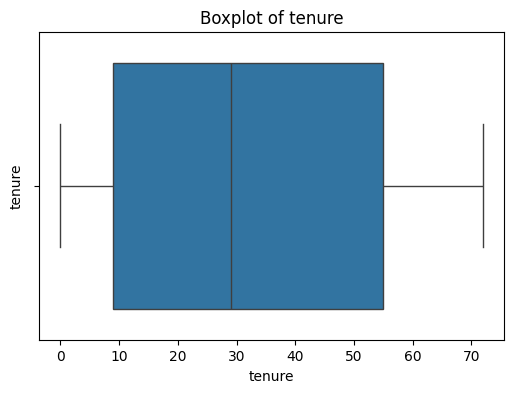

In [109]:
plot_boxplot(df, "tenure")

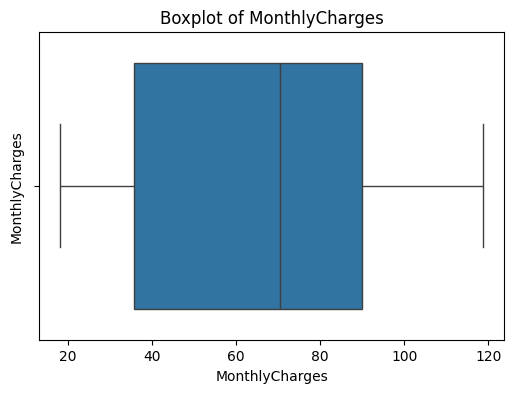

In [110]:
plot_boxplot(df, 'MonthlyCharges')

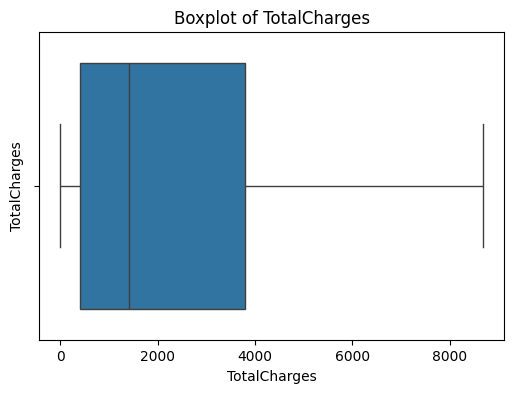

In [111]:
plot_boxplot(df, "TotalCharges")

**Correlation Heatmap for numerical columns**

In [112]:
numerical_features_list

['tenure', 'MonthlyCharges', 'TotalCharges']

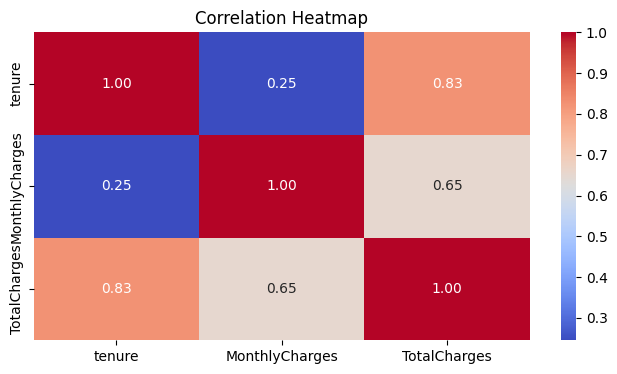

In [113]:
# correlation matrix - Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Categorical features - Analysis**

In [114]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

**Countplot for categorical columns**

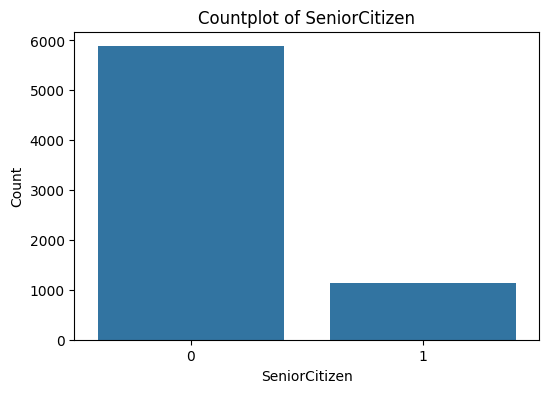

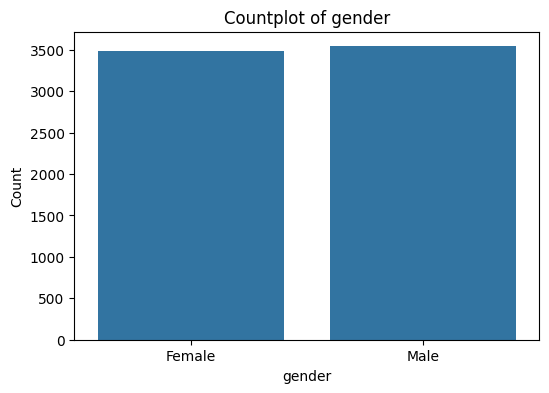

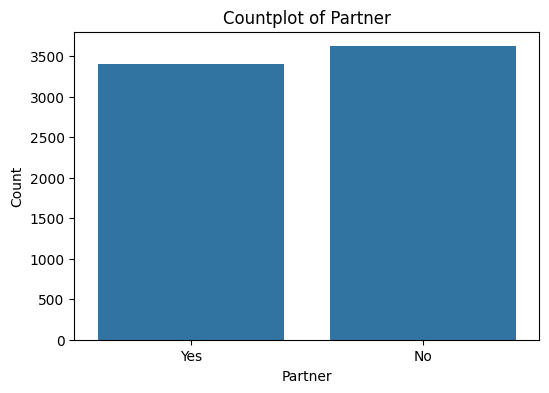

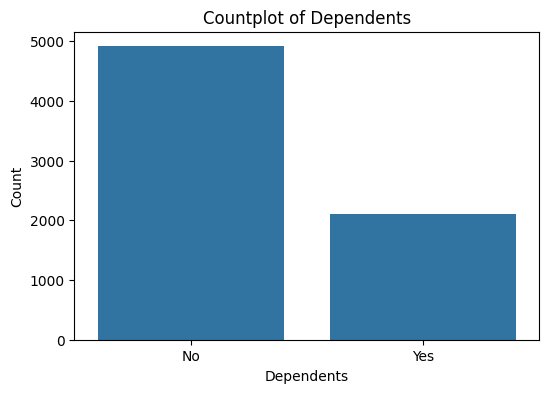

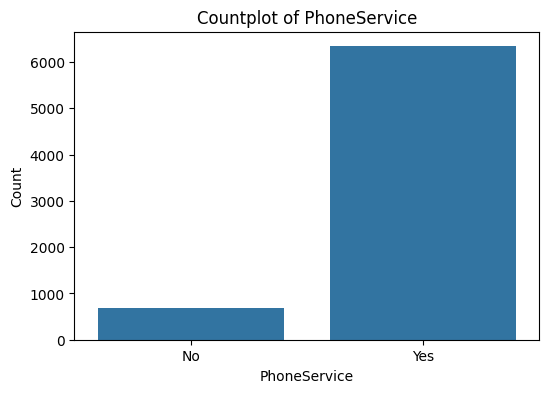

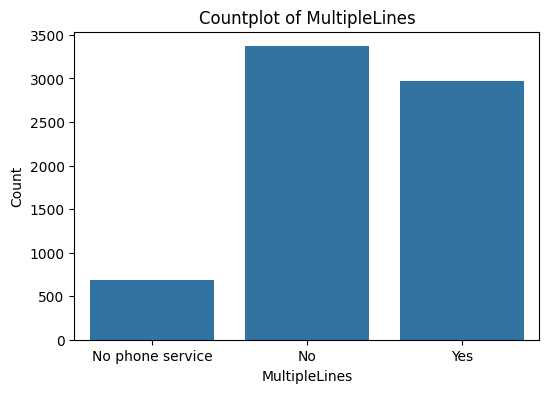

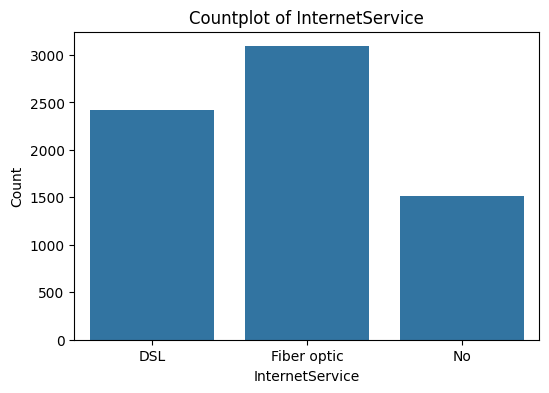

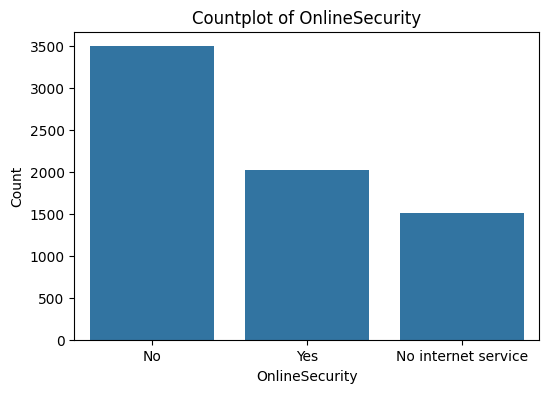

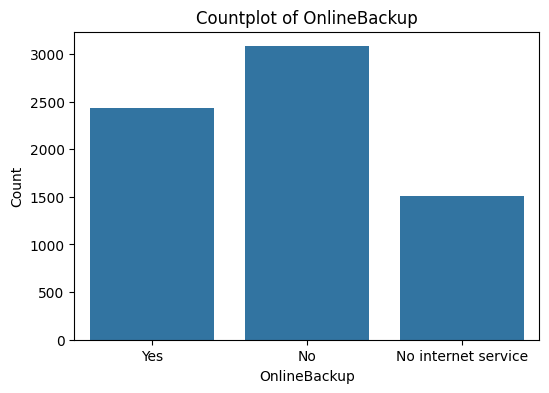

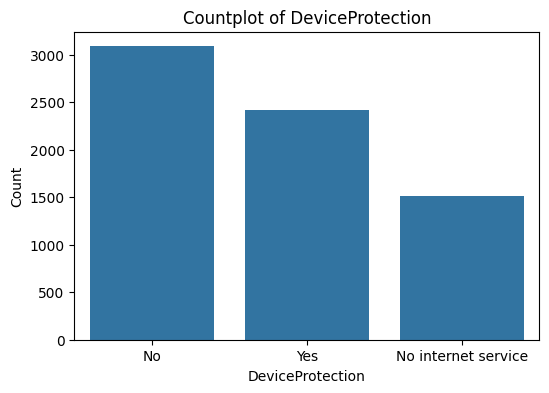

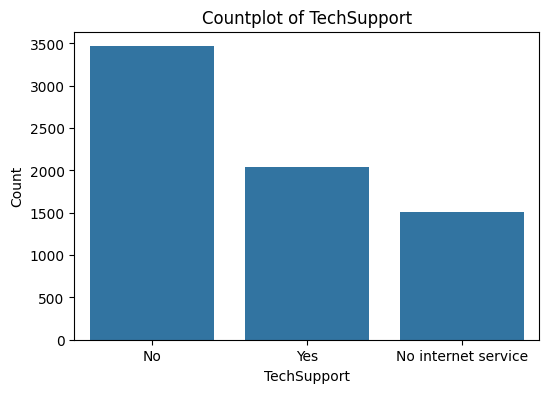

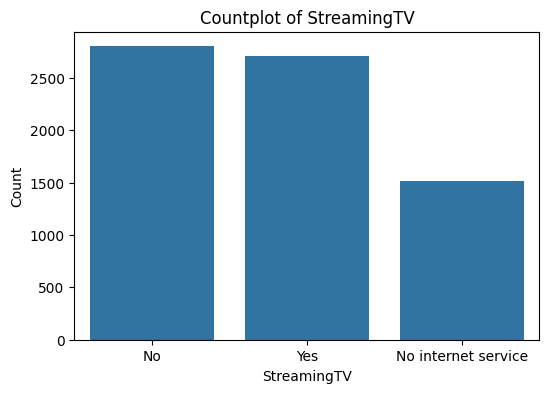

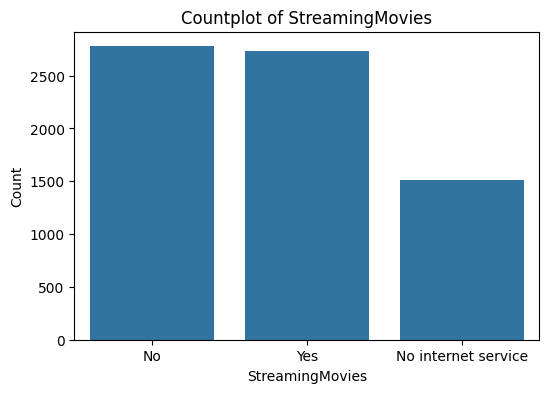

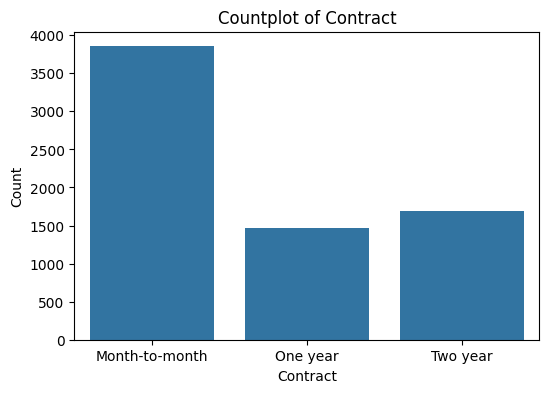

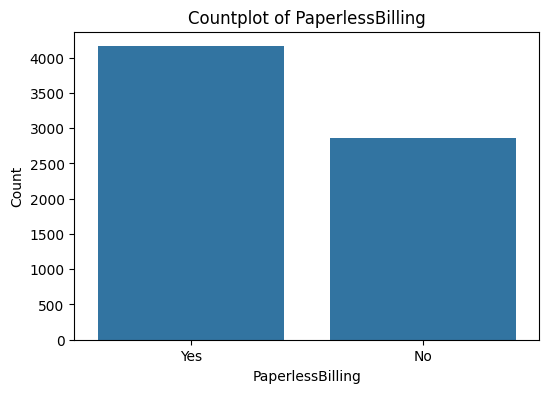

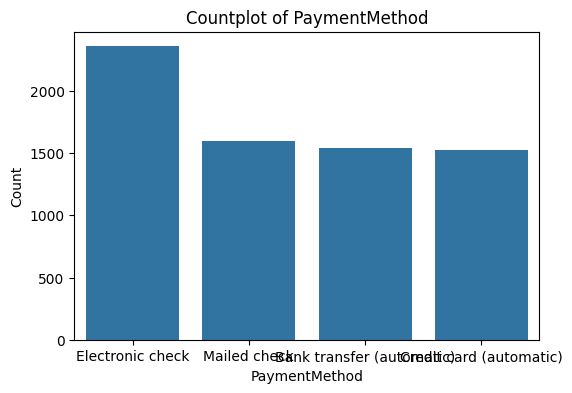

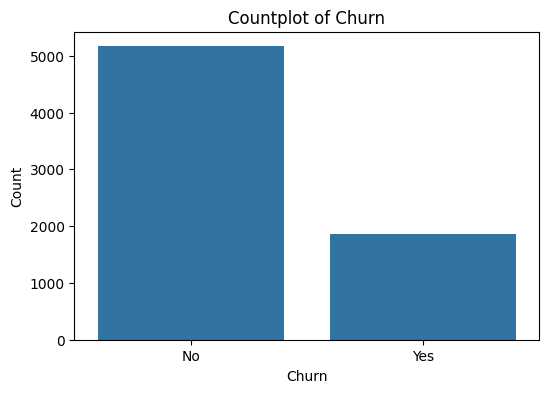

In [116]:
object_cols = df.select_dtypes(include = 'object').columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols # Here we add SeniorCitizen in object col to showing it in a countplot

for col in object_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(x=df[col])
  plt.title(f"Countplot of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

**4. Data Preprocessing**

In [117]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


Encoding all object type column

In [118]:
# encoding through mapping of target column
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

In [119]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [120]:
print(df['Churn'].value_counts())

Churn
0    5164
1    1857
Name: count, dtype: int64


Label encoding of categorical fetaures

In [121]:
# Identifying columns with object datatype
object_columns = df.select_dtypes(include = 'object').columns
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [122]:
# Inititalize a Dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for col in object_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  encoders[col] = le
# save the encoders to a pickle file
with open('encoders.pkl',"wb") as f:
  pickle.dump(encoders, f)

In [123]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [124]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Split the data into Training and Testing**

In [125]:
# Spliting the Features & Target
X = df.drop(columns=['Churn'])
y = df["Churn"]

In [126]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [127]:
print(y_train.shape)

(5616,)


In [128]:
print(y_train.value_counts())

Churn
0    4111
1    1505
Name: count, dtype: int64


**Synthetic Minority Oversampling TEchnique (SMOTE):** For Handeling Imbalanced Target column

In [129]:
smote = SMOTE(random_state=42)

In [130]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [131]:
print(y_train_smote.shape)

(8222,)


In [132]:
print(y_train_smote.value_counts())

Churn
1    4111
0    4111
Name: count, dtype: int64


**5. Model Training**

Training with default hyperparameters

In [133]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

In [134]:
# dictionary to store crossvalidation method
cv_score = {}

# Perform 5-fold crossvalidation for each model
for model_name, model in models.items():
  print(f"Traing Model {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv= 5, scoring="accuracy")
  cv_score[model_name]= scores
  print(f"{model_name} cross validation accuracy: {np.mean(scores):.2f}")
  print("-"*60)

Traing Model Decision Tree with default parameters
Decision Tree cross validation accuracy: 0.79
------------------------------------------------------------
Traing Model Random Forest with default parameters
Random Forest cross validation accuracy: 0.84
------------------------------------------------------------
Traing Model XGBoost with default parameters
XGBoost cross validation accuracy: 0.84
------------------------------------------------------------


In [135]:
cv_score

{'Decision Tree': array([0.71975684, 0.7112462 , 0.84671533, 0.82055961, 0.85218978]),
 'Random Forest': array([0.74042553, 0.76960486, 0.90085158, 0.89051095, 0.90632603]),
 'XGBoost': array([0.73556231, 0.75197568, 0.90450122, 0.89476886, 0.89902676])}

Random Forest and XGBoost gives the highest accuracy compared to other models with default parameters

In [136]:
rfc = RandomForestClassifier(random_state=42)

In [137]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [138]:
print(y_test.value_counts())

Churn
0    1053
1     352
Name: count, dtype: int64


**6. Model Evaluation**

In [139]:
# Evaluate on Test Data
y_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
print("-"*60)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("-"*60)
print("Classifiaction Report:\n", classification_report(y_test, y_pred))


Accuracy Score:
 0.7644128113879004
------------------------------------------------------------
Confusion Matrix:
 [[869 184]
 [147 205]]
------------------------------------------------------------
Classifiaction Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1053
           1       0.53      0.58      0.55       352

    accuracy                           0.76      1405
   macro avg       0.69      0.70      0.70      1405
weighted avg       0.77      0.76      0.77      1405



In [140]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.to_list}

with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

**7. Load the saved  model and  build a Predictive System**

In [141]:
# Load the saved model and feature names
with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

  loaded_model = model_data["model"]
  loaded_feature_names = model_data["features_names"]

In [142]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [143]:
print(loaded_feature_names)

<bound method IndexOpsMixin.tolist of Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')>


In [144]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

In [145]:
input_data_df = pd.DataFrame([input_data])

In [148]:
input_data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [146]:
with open ("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

In [151]:
# encode categorical features using the saved encoders
for column, encoder in encoders.items():
  input_data_df[column]= encoder.transform(input_data_df[column])

In [153]:
# make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)
print(prediction)

[0]


In [156]:
# result
print(f'Prediction:{"churn" if prediction[0] == 1 else "No Churn"}')
print(f'Prediction Probability: {pred_prob}')

Prediction:No Churn
Prediction Probability: [[0.79 0.21]]


In [157]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

**6.** **Explain Predictions using ELI5**

In [158]:
# install & import eli5
!pip install eli5
import eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.2 MB/s eta 0:00:00


In [160]:
eli5.show_prediction(rfc, X_test.iloc[0], feature_names=X_test.columns.to_list())

In [161]:
eli5.show_weights(rfc, feature_names=X_test.columns.to_list())

Weight,Feature
0.1436 ± 0.0419,MonthlyCharges
0.1352 ± 0.0339,TotalCharges
0.1249 ± 0.0867,tenure
0.1240 ± 0.1801,Contract
0.0894 ± 0.1192,OnlineSecurity
0.0834 ± 0.1301,TechSupport
0.0403 ± 0.0103,PaymentMethod
0.0370 ± 0.0525,OnlineBackup
0.0290 ± 0.0565,InternetService
0.0268 ± 0.0389,DeviceProtection


# **Summary**

This project focuses on predicting customer churn for a telecommunications company using machine learning.  The process involves several key steps:

1. **Data Loading and Preprocessing:** The project begins by loading customer data from a CSV file, handling missing values (replacing blanks in 'TotalCharges' with 0), and removing duplicates.  Exploratory Data Analysis (EDA) is performed using pandas, matplotlib, and seaborn, including visualizations of numerical and categorical features, and data aggregation via SQLite queries. Feature engineering is performed using Label Encoding for categorical features and the encoders are saved.

2. **Data Balancing:**  The target variable ('Churn') exhibits class imbalance.  SMOTE (Synthetic Minority Oversampling Technique) is applied to the training data to address this imbalance.

3. **Model Training and Evaluation:** Three machine learning models—Decision Tree, Random Forest, and XGBoost—are trained and evaluated using 5-fold cross-validation. Random Forest is chosen for its superior performance.  Model evaluation on the test set uses metrics like accuracy, confusion matrix, and classification report.  The trained model and feature names are then saved using pickle.

4. **Prediction System:** A predictive system is created that loads the trained Random Forest model and the encoders.  A sample input is processed through the system, demonstrating how to make predictions and display the predicted probability.

5. **Model Explainability:**  The project utilizes ELI5 to provide insights into the model's predictions, showing the feature importance and how individual features contribute to a prediction.  The model weights and prediction for a specific data point are examined.


In summary, the project successfully builds a predictive model for customer churn, addresses data imbalance, evaluates model performance, and provides tools for interpreting model predictions.  The use of pickling ensures model persistence, allowing for easy reuse of the trained model and encoders.


### **Final Recommendations**
*	**Promote Long-term Contracts:** Encourage customers to switch from month-to-month to annual or biennial contracts through targeted offers.
*	**Incentivize Alternative Payment Methods:** Provide discounts or perks for switching from electronic checks to automated payments.
*	**Early Tenure Engagement:** Implement onboarding and loyalty programs for new customers, especially within the first year.
*	**Monitor High-risk Segments:** Use predictive analytics to proactively engage customers showing churn risk signals (e.g., high monthly charges, short tenure).
*	**Continuous Feedback:** Regularly collect and act on customer feedback to address pain points and improve service quality.
